In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
# Renomeando as colunas

renomear = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}
dados = dados.rename(columns = renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [9]:
# Em nossos dados temos que 'não_finalizado' = 1 e finalizado=0, portanto, é prudente deixar o valor 1 na 
# forma afirmativa e o 0 na forma negativa

trocar = {
    0: 1,
    1: 0
}
dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head(10)

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
5,1,33,173,0
6,1,64,1965,0
7,1,99,1993,0
8,1,45,278,0
9,0,96,12479,1


<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

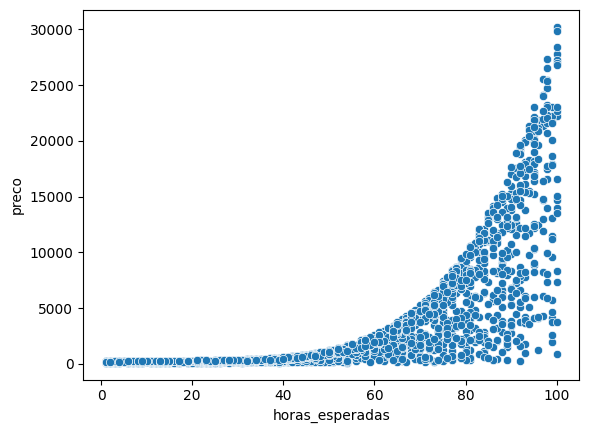

In [11]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

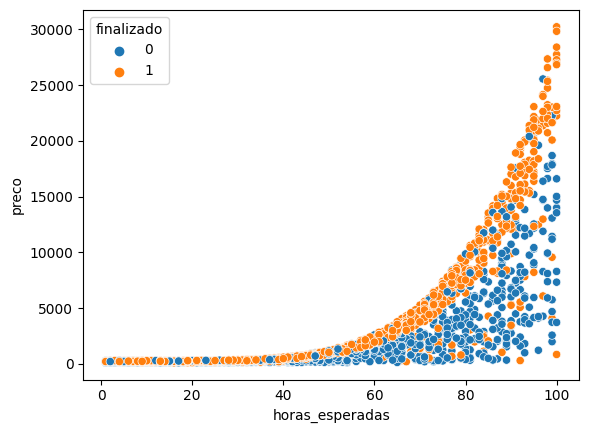

In [12]:
sns.scatterplot(x='horas_esperadas', y='preco', hue= 'finalizado', data=dados)

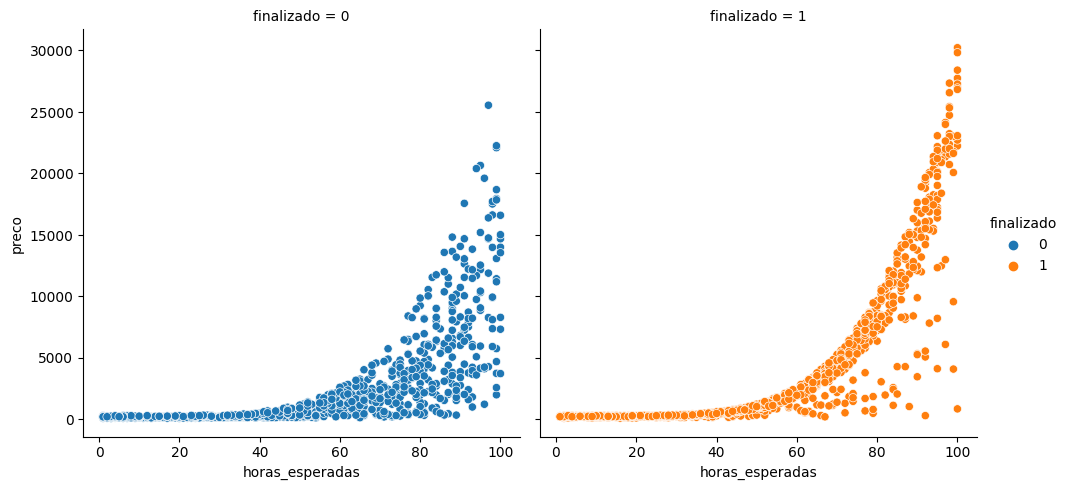

In [17]:
sns.relplot(x='horas_esperadas', y='preco', col='finalizado', hue='finalizado', data=dados)

In [20]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [18]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [65]:
# Passando um parâmetro para balancear os dados de treino e teste de acordo com a variável resposta
# Seperando os dados om o auxílio do sklearn

SEED = 27
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state = SEED, 
                                                    test_size = 0.25,
                                                    stratify = y)

print(f'Treinamos o modelo com {len(x_train)} elementos e testaremos com {len(x_test)} elementos!\n')

# Treinando o modelo
modelo = LinearSVC()
modelo.fit(x_train, y_train)

# Aplicando o modelo nos dados de teste
previsoes = modelo.predict(x_test)

# Verificando a ACURÁCIA do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'A acurácia apurada foi de {(acuracia*100).round(2)}%')

Treinamos o modelo com 1617 elementos e testaremos com 540 elementos!

A acurácia apurada foi de 47.96%


c:\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

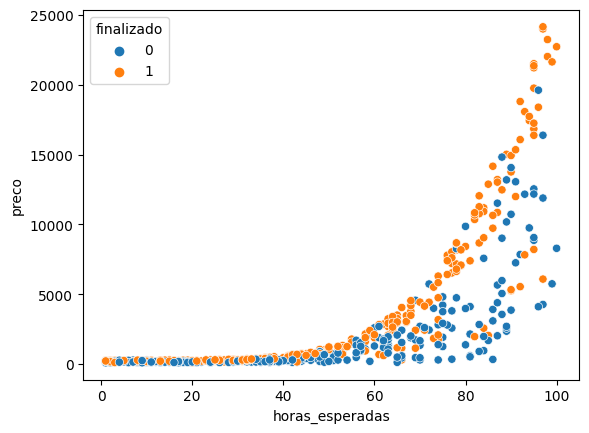

In [66]:
sns.scatterplot(x='horas_esperadas', y='preco', hue= y_test, data=x_test)

In [67]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 24142


In [68]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [69]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.390158e+04],
       [9.802000e+01, 2.390158e+04],
       [9.901000e+01, 2.390158e+04]])

In [70]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

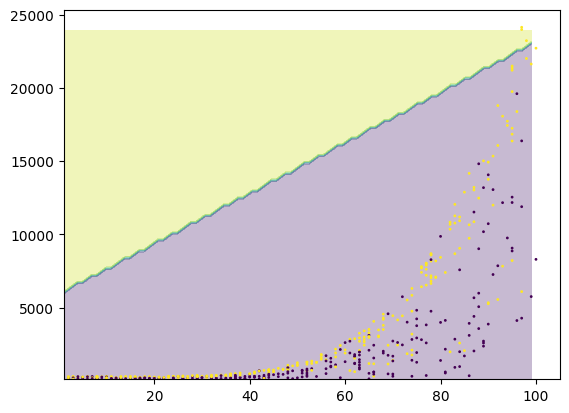

In [71]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.preco, c=y_test, s=1)

Testando o SVM

In [72]:
# Passando um parâmetro para balancear os dados de treino e teste de acordo com a variável resposta
# Seperando os dados om o auxílio do sklearn

from sklearn.svm import SVC

SEED = 27
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state = SEED, 
                                                    test_size = 0.25,
                                                    stratify = y)

print(f'Treinamos o modelo com {len(x_train)} elementos e testaremos com {len(x_test)} elementos!\n')

# Treinando o modelo
modelo = SVC()
modelo.fit(x_train, y_train)

# Aplicando o modelo nos dados de teste
previsoes = modelo.predict(x_test)

# Verificando a ACURÁCIA do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'A acurácia apurada foi de {(acuracia*100).round(2)}%')

Treinamos o modelo com 1617 elementos e testaremos com 540 elementos!

A acurácia apurada foi de 55.0%


1 100 100 24142


c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


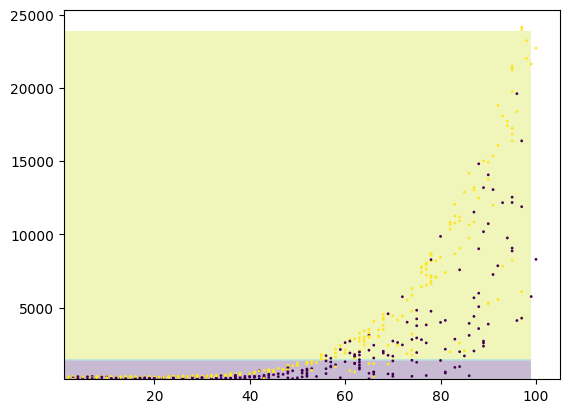

In [73]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()
print(x_min, x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.preco, c=y_test, s=1)